In [97]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
df = pd.read_csv("train.csv")
np.random.seed(5)

In [3]:
df.head(100)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [12]:
df.isnull().any() ##checking the null data

ID         False
crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [10]:
filter1 = df.drop(['chas','ID','rad'],axis=1)##removing the discrete data

In [9]:
print(filter1)

         crim    zn  indus    nox     rm    age     dis  tax  ptratio   black  \
0     0.00632  18.0   2.31  0.538  6.575   65.2  4.0900  296     15.3  396.90   
1     0.02731   0.0   7.07  0.469  6.421   78.9  4.9671  242     17.8  396.90   
2     0.03237   0.0   2.18  0.458  6.998   45.8  6.0622  222     18.7  394.63   
3     0.06905   0.0   2.18  0.458  7.147   54.2  6.0622  222     18.7  396.90   
4     0.08829  12.5   7.87  0.524  6.012   66.6  5.5605  311     15.2  395.60   
5     0.22489  12.5   7.87  0.524  6.377   94.3  6.3467  311     15.2  392.52   
6     0.11747  12.5   7.87  0.524  6.009   82.9  6.2267  311     15.2  396.90   
7     0.09378  12.5   7.87  0.524  5.889   39.0  5.4509  311     15.2  390.50   
8     0.62976   0.0   8.14  0.538  5.949   61.8  4.7075  307     21.0  396.90   
9     0.63796   0.0   8.14  0.538  6.096   84.5  4.4619  307     21.0  380.02   
10    0.62739   0.0   8.14  0.538  5.834   56.5  4.4986  307     21.0  395.62   
11    1.05393   0.0   8.14  

In [73]:
df_new = filter1[filter1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 5).all(axis=1)] ##checking the outliers

In [63]:
df.shape, df_new.shape

((333, 15), (331, 15))

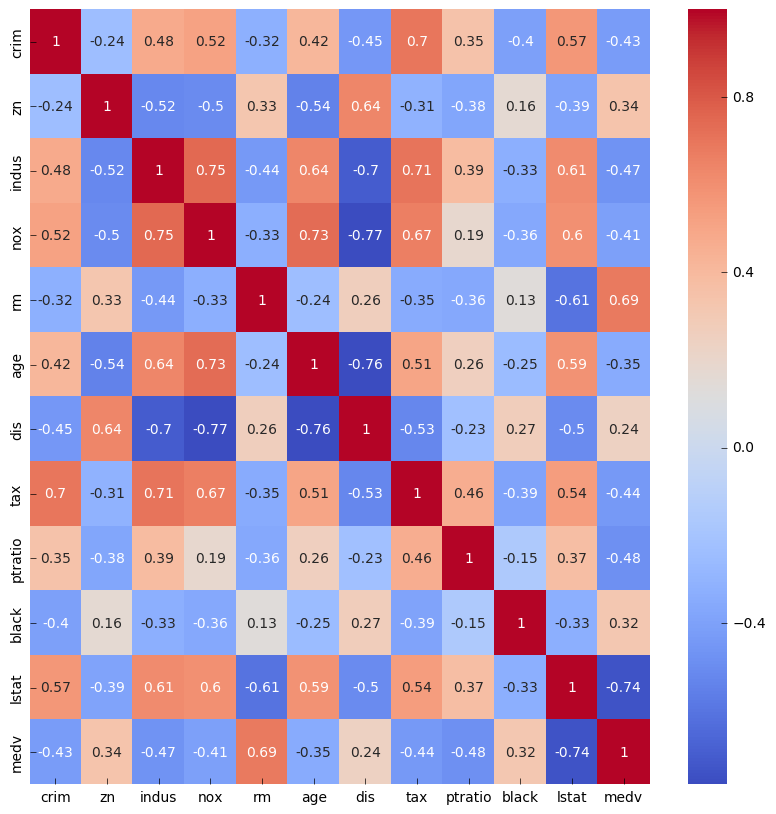

In [74]:
corr = df_new.corr()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr, cmap = "coolwarm", annot = True)

In [101]:
df_new1 = df_new.drop(['dis'],axis= 1) ##removing correlated features


In [78]:
df_new1.skew

<bound method DataFrame.skew of          crim    zn  indus     rm    age  tax  ptratio   black  lstat  medv
0     0.00632  18.0   2.31  6.575   65.2  296     15.3  396.90   4.98  24.0
1     0.02731   0.0   7.07  6.421   78.9  242     17.8  396.90   9.14  21.6
2     0.03237   0.0   2.18  6.998   45.8  222     18.7  394.63   2.94  33.4
3     0.06905   0.0   2.18  7.147   54.2  222     18.7  396.90   5.33  36.2
4     0.08829  12.5   7.87  6.012   66.6  311     15.2  395.60  12.43  22.9
5     0.22489  12.5   7.87  6.377   94.3  311     15.2  392.52  20.45  15.0
6     0.11747  12.5   7.87  6.009   82.9  311     15.2  396.90  13.27  18.9
7     0.09378  12.5   7.87  5.889   39.0  311     15.2  390.50  15.71  21.7
8     0.62976   0.0   8.14  5.949   61.8  307     21.0  396.90   8.26  20.4
9     0.63796   0.0   8.14  6.096   84.5  307     21.0  380.02  10.26  18.2
10    0.62739   0.0   8.14  5.834   56.5  307     21.0  395.62   8.47  19.9
11    1.05393   0.0   8.14  5.935   29.3  307     21.0  

In [82]:
df_new2 = (df_new1 - df_new1.mean())/(df_new1.max() - df_new1.min()) ##normalization

In [91]:
df_new2['ID'] =df['ID']
df_new2['chas']= df['chas']
df_new2['rad']=df['rad']
X = df_new2
Y = df_new2['medv']
X.shape,Y.shape


((331, 13), (331,))

In [102]:
def evaluate(X,Y,n):
    
    train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
        model = LinearRegression().fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=sklearn.metrics.mean_squared_error(Y_train, Y_predtrain)
        testloss+=sklearn.metrics.mean_squared_error(Y_test, Y_predtest)
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)   

In [103]:
evaluate(X,Y,100)

1.0
1.39750581201e-28
1.0
1.34567165821e-28
